# <center>  Homework2 
### <center> WANG Yuwen sid: 1155201505

#### Q1

(1)

(array([1.462e+03, 1.443e+03, 1.427e+03, 1.392e+03, 1.342e+03, 1.326e+03,
        1.255e+03, 1.115e+03, 1.112e+03, 1.047e+03, 9.860e+02, 9.660e+02,
        9.220e+02, 9.460e+02, 8.650e+02, 7.910e+02, 7.630e+02, 7.530e+02,
        6.210e+02, 6.510e+02, 6.350e+02, 5.890e+02, 5.400e+02, 5.140e+02,
        5.030e+02, 4.520e+02, 4.120e+02, 3.910e+02, 3.790e+02, 3.570e+02,
        2.970e+02, 3.000e+02, 2.880e+02, 2.370e+02, 2.490e+02, 2.230e+02,
        1.980e+02, 1.900e+02, 1.890e+02, 1.640e+02, 1.500e+02, 1.370e+02,
        1.450e+02, 1.250e+02, 1.080e+02, 9.800e+01, 9.100e+01, 9.600e+01,
        7.300e+01, 7.700e+01, 5.000e+01, 6.500e+01, 5.600e+01, 4.600e+01,
        4.800e+01, 3.000e+01, 3.700e+01, 2.900e+01, 1.800e+01, 2.000e+01,
        2.100e+01, 1.900e+01, 1.300e+01, 2.200e+01, 1.500e+01, 2.600e+01,
        1.700e+01, 6.000e+00, 6.000e+00, 8.000e+00, 1.000e+01, 7.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 1.000e+00,
        3.000e+00, 2.000e+00, 2.000e+0

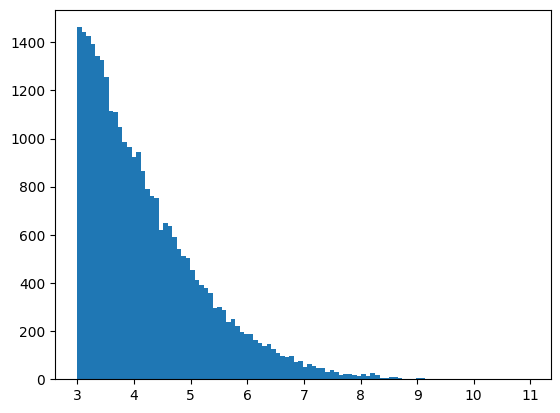

In [1]:
import numpy as np
import scipy
from functools import cache
from pynverse import inversefunc
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
mu=1
c=3
sigma=np.sqrt(5)

def cdf(x):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

def cdf_truc(x):
    return (cdf(x)-cdf(c))/(1-cdf(c))

def transform(u):
    return inversefunc(cdf_truc, u)

sample_size=30000
y =  scipy.stats.uniform.rvs(size=sample_size)  
y=transform(y)     
plt.hist(y, bins=100)

(2) (b), (c)

0.6307843277096105
0.9057666666666667


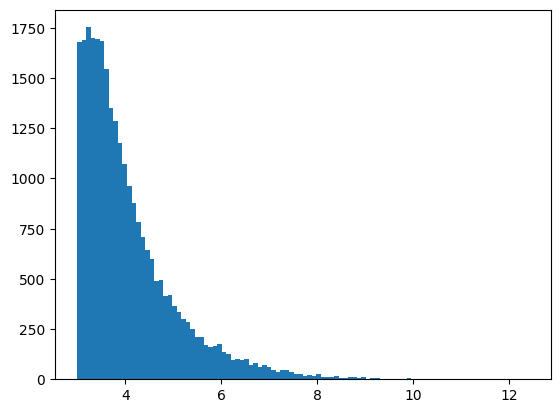

In [2]:
import math
sample_size=30000
alpha=1
M=math.exp(0.5)/(math.sqrt(10*math.pi)*(1-scipy.stats.norm.cdf(2/math.sqrt(5))))
print(1/M)
def pdf_f(x):
    if x<c:
        return 0
    else:
        return scipy.stats.norm.pdf(x, loc=c, scale=sigma)/(1-cdf(c))
def g(x):
    return scipy.stats.expon.pdf(x, loc=c, scale=alpha)

y = scipy.stats.expon.rvs(loc=c, scale=alpha, size=sample_size)
u = scipy.stats.uniform.rvs(size=sample_size)
x=[]
for i in range(sample_size):
    if u[i]<pdf_f(y[i])/(M*g(y[i])):
        x.append(y[i])
plt.hist(x, bins=100)
print(len(x)/sample_size)

#### Q2

[-4.92217887  5.61838026 -4.76750544 -4.31744859 -5.31011677 -7.43483776
 -3.9611754  -2.81302035 -4.55863556  4.89984477 -5.13644474  4.88094581
 -4.98259059  3.87798127 -5.51709446  4.00297317 -4.75120084  4.70335885
 -4.50478868 -5.17470316  5.98633519  5.2135339  -2.80930027  3.10363908
  4.35308331  5.90148689 -2.47167429 -5.24863478 -4.95633101  4.77368576
 -3.66854289 -5.28730786  5.68006984  4.6801984   3.72744124 -4.68645228
  5.50318481  6.29322588 -5.11044703  4.38263794  5.5627611   5.24073709
 -4.71933492  4.9268873  -3.83966143 -4.63050728  6.90465871 -3.8889433
 -4.3409502  -6.62743834 -4.39768072  5.4202822  -4.18904833 -3.95555791
 -5.40087819 -4.17599438  4.43769457 -3.04512192  3.66804833  3.23931144
 -6.65072127 -5.89055558  3.8808846  -3.0439211  -5.3264995   3.65732421
  6.11438298  4.41347606  3.76314662  5.87583893  5.62336218 -5.43495668
 -3.59246     5.12910158 -3.3830504  -4.49725912  6.55880554 -4.8905973
  3.7802556   7.44936865  4.45422583  4.80116214  4.2

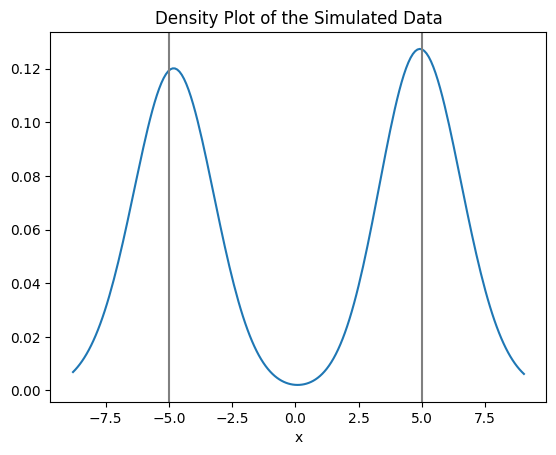

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# (a) Data Points
#-----------------------------------------------------------------------------
np.random.seed(1)

# Step 1: generate u_i ~ Unif(0,1)
U = np.random.uniform(0,1,200)

# Step 2: get group label Z_i and generate x_i
Z = U < 0.5
data = np.empty(200)
for i in range(200):
  if Z[i]:
    data[i] = np.random.normal(-5,1)
  else:
    data[i] = np.random.normal(5,1)

print(data)

# Density plot
density = gaussian_kde(data)
xs = np.linspace(np.min(data)-1, np.max(data)+1, 200)
density.covariance_factor = lambda : .25
density._compute_covariance()

plt.plot(xs,density(xs), label="Density plot of the simulated data")
plt.title("Density Plot of the Simulated Data")
plt.xlabel("x")
plt.axvline(x=-5, color='gray')
plt.axvline(x=5, color='gray')
plt.show() 

##### Gibbs sampler

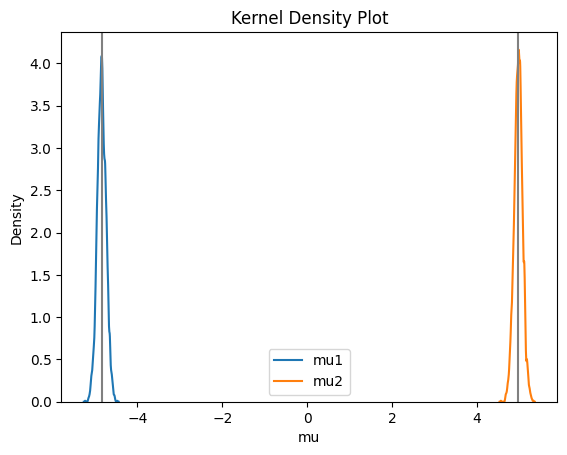

Mean of mu1 sample: -4.840332
Mean of mu2 sample: 4.979115


In [9]:
import numpy as np
from scipy.stats import truncnorm, binom
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

np.random.seed(1)
# Constants
nRep = 5000
tau = 10

# set initial values of mu1, mu2
mu1_0 = np.mean(data[data<0])
mu2_0 = np.mean(data[data>0])
mu1 = np.empty(nRep+1)
mu2 = np.empty(nRep+1)
mu1[0] = mu1_0
mu2[0] = mu2_0

Z = np.empty(200)

#update mu1, mu2, Z based on the last iteration
for iRep in range(1, nRep+1):
    np.random.seed(iRep)
    # 1. update Z
    for i, xi in enumerate(data):
        temp1 = np.exp(-(xi - mu1[iRep - 1]) ** 2 / 2)
        temp2 = np.exp(-(xi - mu2[iRep - 1]) ** 2 / 2)
        Z[i] = binom.rvs(n=1, p=temp1 / (temp1 + temp2))
        
    # 2. update mu1, mu2
    Sum_z1 = np.sum(Z)
    Sum_z0 = 200-np.sum(Z)
    Sum_xz1 = np.sum([x for x, z in zip(data, Z) if z == 1])
    Sum_xz0 = np.sum([x for x, z in zip(data, Z) if z == 0])
    mu1_mean = Sum_xz1/(1/tau+Sum_z1)
    mu2_mean = Sum_xz0/(1/tau+Sum_z0)
    mu1_sd = np.sqrt(1/(1/tau+Sum_z1))
    mu2_sd = np.sqrt(1/(1/tau+Sum_z0))
    mu1[iRep] = truncnorm.rvs(a=-np.inf, b=mu2[iRep-1], loc=mu1_mean, scale=mu1_sd)
    mu2[iRep] = truncnorm.rvs(a=mu1[iRep], b=np.inf, loc=mu2_mean, scale=mu2_sd)

# Discard the first 1500 samples as burn in
mu1_sample = mu1[1501:]
mu2_sample = mu2[1501:]

# Density Plot
sns.kdeplot(mu1_sample, label='mu1', bw_adjust=0.5)
sns.kdeplot(mu2_sample, label='mu2', bw_adjust=0.5)
plt.axvline(np.mean(mu1_sample), color='gray')
plt.axvline(np.mean(mu2_sample), color='gray')
plt.title("Kernel Density Plot")
plt.xlabel("mu")
plt.ylabel("Density")
plt.legend()
plt.show()

# Posterior mean
print(f'Mean of mu1 sample: {np.mean(mu1_sample):.6f}')
print(f'Mean of mu2 sample: {np.mean(mu2_sample):.6f}')

##### Metropolis-Hasting

Acceptance rate: 0.5392


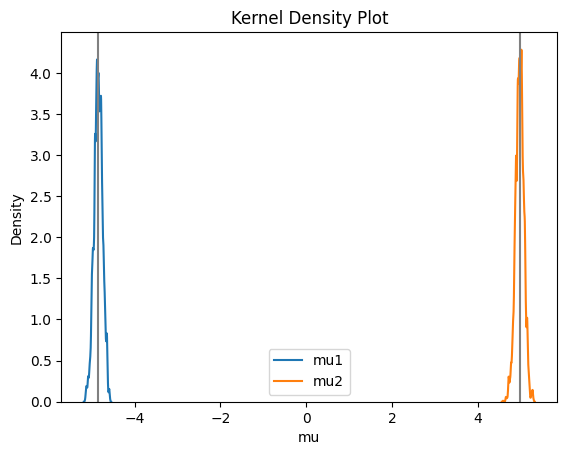

Mean of mu1 sample: -4.848703
Mean of mu2 sample: 4.981856


In [10]:
import numpy as np
from scipy.stats import truncnorm, uniform
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)

# un-normalized posterior
def posterior(mu1, mu2, x, tau):
    out_i = np.log(np.exp(-(x - mu1)**2 / 2) + np.exp(-(x - mu2)**2 / 2))
    logd0 = np.sum(out_i) - (mu1 ** 2 + mu2 ** 2) / (2 * tau)
    C = np.sum(np.log(np.exp(-(x+5)**2/2) + np.exp(-(x-5)**2/2))) - (5**2+5**2)/(2*tau)
    logd0 = logd0 - C
    return np.exp(logd0)

nRep = 5000
tau = 10; mu1 = -5; mu2 = 5

# Step 0: set initial values of mu1, mu2
mu1_0 = np.mean(data[data<0])
mu2_0 = np.mean(data[data>0])
mu1_all = np.empty(nRep + 1)
mu2_all = np.empty(nRep + 1)
mu1_all[0] = mu1_0
mu2_all[0] = mu2_0

# Step 1: update mu1, mu2 in each iteration using MH algorithm
c = 0.16 # set the step size --> convergence rate
count = 0
accept = 0

for iRep in range(1, nRep + 1):
    np.random.seed(iRep)
    # 1. generate mu1, mu2 based on last iteration
    mu1 = np.random.uniform(mu1_all[iRep-1] - c, mu1_all[iRep-1] + c)
    mu2 = np.random.uniform(mu2_all[iRep-1] - c, mu2_all[iRep-1] + c)

    # 2. generate u ~ Unif(0,1)
    u = np.random.uniform(0, 1)
    p = min(posterior(mu1, mu2, data, tau) / posterior(mu1_all[iRep-1], mu2_all[iRep-1], data, tau), 1)
    if u < p:
        accept += 1
        mu1_all[iRep] = mu1
        mu2_all[iRep] = mu2
    else:
        mu1_all[iRep] = mu1_all[iRep-1]
        mu2_all[iRep] = mu2_all[iRep-1]
    count += 1

print("Acceptance rate:", accept/count)

# Step 2: discard the first 1500 samples as burn in
mu1_sample = mu1_all[1501:]
mu2_sample = mu2_all[1501:]

# Kernel Density Plot
sns.kdeplot(mu1_sample, label='mu1', bw_adjust=0.5)
sns.kdeplot(mu2_sample, label='mu2', bw_adjust=0.5)
plt.axvline(np.mean(mu1_sample), color='gray')
plt.axvline(np.mean(mu2_sample), color='gray')
plt.title("Kernel Density Plot")
plt.xlabel("mu")
plt.ylabel("Density")
plt.legend()
plt.show()

# Posterior mean
print(f'Mean of mu1 sample: {np.mean(mu1_sample):.6f}')
print(f'Mean of mu2 sample: {np.mean(mu2_sample):.6f}')

## Q3

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import random
import math
from tqdm import tqdm

def linear_model_score(selected_features, X, y):
    # Select the columns corresponding to the selected features
    X_selected = X[:, selected_features]
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model to the selected features and target variable
    model.fit(X_selected, y)
    
    # Predict the target variable using the selected features
    y_pred = model.predict(X_selected)
    
    # Calculate the R-squared score
    score = np.linalg.norm(y-y_pred)**2
    return score


def simulated_annealing(X, y, temperature=1000, cooling_rate=0.95, num_iterations=5000):
    num_features = X.shape[1]
    current_features = random.sample(range(num_features), 3)
    current_loss = linear_model_score(current_features, X, y)
    
    best_features = current_features
    best_loss = current_loss
    
    for i in tqdm(range(num_iterations)):
        temperature *= cooling_rate
        
        # Generate a random neighbor by swapping two features
        neighbor_features = current_features.copy()
        feature1 = random.sample(range(num_features), 1)
        rand_indice = random.sample([0, 1, 2], 1)
        neighbor_features[rand_indice[0]] = feature1[0]
        
        # Calculate the loss for the neighbor features
        neighbor_loss = linear_model_score(neighbor_features, X, y)
        
        # Determine whether to accept the neighbor features
        if neighbor_loss < current_loss:
            current_features = neighbor_features
            current_loss = neighbor_loss
        else:
            acceptance_probability = math.exp((current_loss - neighbor_loss) / temperature)
            if random.random() < acceptance_probability:
                current_features = neighbor_features
                current_loss = neighbor_loss
        
        # Update the best features and loss
        if current_loss < best_loss:
            best_features = current_features
            best_loss = current_loss
    
    return best_features, best_loss


data = np.loadtxt('Problem3_data.txt', skiprows=1, delimiter=' ')
y = data[:, 1000]
X = data[:, 1:999]
best_features, best_loss = simulated_annealing(X, y)
print("Best Features:", np.array(best_features)+1)
print("Best Loss:", best_loss)


100%|██████████| 5000/5000 [00:00<00:00, 5740.87it/s]

Best Features: [800 600 700]
Best Loss: 1.2025011284327642


## Q4

In [14]:
from scipy.stats import dirichlet
import numpy as np
import string
import random

# Load the data
data = np.genfromtxt('Problem4_data.txt', dtype='str')
print(data.shape)

# To replicate the DNA array
DNA = data[1::2] 
L = len(DNA[0])
N_DNA = len(DNA)
W = 20
Nrep = L - W + 1


(100,)


In [15]:

# get alpha
total = np.array([list(map(i.count, ["A", "C", "G", "T"])) for i in DNA]).T
alpha = 0.1 * total.sum(axis=1)

# Initialization
type_ = h_N = motif = np.zeros(W)
np.random.seed(0)
A = np.random.randint(1, Nrep + 1, size=N_DNA)
theta0_ki = BG_Given_k = motif_k = pki = np.zeros((Nrep, N_DNA))
beta = np.zeros((4, W))
p = np.zeros(W)

motif_A = [''] * N_DNA
test = np.zeros((4, N_DNA))

for l in range(1000):
    for k in range(N_DNA):
        test[:, k] = np.array([BG_Given_k[i, k].count(c) for c in "ACGT"])
    theta0 = dirichlet.rvs(np.sum(test, axis=1) + alpha)[0]
    for k in range(N_DNA):
        motif_S = np.array([list(DNA[k][A[k]:A[k] + W]) for _ in range(N_DNA)])
        for i in range(Nrep):  # Nrep = L - W + 1
            BG_Given_k[i, k] = DNA[k][:i] + DNA[k][i + W:]
            motif_k[i, k] = DNA[k][i:i + W]
            theta0_ki[i, k] = np.prod(
                theta0 ** np.array([motif_k[i, k].count(c) for c in "ACGT"]))
            for j in range(W):
                beta[:, j] = np.array([motif_S[_][j].count(c) for c in "ACGT"]) * 0.1
                type_[j] = motif_k[i, k][j]
                h_N[j] = np.prod((np.array([motif_S[_][j].count(c) for c in "ACGT"] + beta[:, j]) 
                                 ** np.array([type_[j] == c for c in "ACGT"])))
            pki[i, k] = theta0_ki[i, k] * np.prod(h_N)
        pki[:, k] /= np.sum(pki[:, k])
        A[k] = np.where(np.random.multinomial(1, pki[:, k]))[0][0]
    if (delta := random.randint(0, 1)):
        if all(x > 1 for x in A):
            motif_A = [DNA[_][A[_]:A[_] + W] for _ in range(N_DNA)]
            motif_A_delta = [DNA[_][A[_] + 1:A[_] + 1 + W] for _ in range(N_DNA)]
        else:
            continue
    else:
        if all(x < Nrep for x in A):
            motif_A = [DNA[_][A[_]:A[_] + W] for _ in range(N_DNA)]
            motif_A_delta = [DNA[_][A[_] - 1:A[_] - 1 + W] for _ in range(N_DNA)]
        else:
            continue
    for j in range(W):
        str_motif_A = "".join(s[j] for s in motif_A)
        str_motif_A_delta = "".join(s[j] for s in motif_A_delta)
        p[j] = np.prod([np.math.factorial(str_motif_A_delta.count(c)) 
                        / np.math.factorial(str_motif_A.count(c)) for c in "ACGT"])
    if random.random() < min(np.prod(p), 1):
        A += (1 if delta else -1)
    if l % 100 == 99:
        print(l + 1, ">>")
print("End")

# output estimates
print(A)

for k in range(N_DNA):
    test[:, k] = np.array([f"{DNA[k][:A[k]]}{DNA[k][A[k] + W:]}".count(c) for c in "ACGT"])
print(dirichlet.mean(np.sum(test, axis=1) + alpha))

Result = np.array([DNA[_][A[_]:A[_] + 20] for _ in range(N_DNA)])
print(Result)

T_motif = np.array([list(Result[_]) for _ in range(N_DNA)])
theta = np.zeros((4, W))
for j in range(W):
    theta[:, j] = np.array(["".join(T_motif[:, j]).count(c) for c in "ACGT"]) / N_DNA
print(theta)

NameError: name 'i' is not defined